In [2]:
import pandas as pd
import nltk

## Unstructured data to Structured data

In [3]:
amazon=pd.read_csv("amazon_reviews.csv")

In [4]:
amazon.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09
1,1,0528881469,"[12, 15]",1.0,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1.290643e+09
2,2,0528881469,"[43, 45]",3.0,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1.283990e+09
3,3,0528881469,"[9, 10]",2.0,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1.290557e+09
4,4,0528881469,"[0, 0]",1.0,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1.317254e+09


In [164]:
amazon.shape

(999, 10)

In [166]:
docs=amazon['reviewText'].fillna('').str.lower().str.replace('[^a-z ]','')
docs.head()

0    we got this gps for my husband who is an otr o...
1    im a professional otr truck driver and i bough...
2    well what can i say  ive had this unit in my t...
3    not going to write a long review even thought ...
4    ive had mine for a year and heres what we got ...
Name: reviewText, dtype: object

In [172]:
def clean_text(row):
    row_words=row.split(" ")
    clean_words=[word for word in row_words if word not in stop_words]
    return ' '.join(clean_words)
docs_clean=docs.apply(lambda x: clean_text(x)) #or docs.apply(clean_text)
docs_clean.head()

0    got gps husband otr road trucker  impressed sh...
1    im professional otr truck driver bought tnd  t...
2    well say  ive unit truck four days  prior garm...
3    going write long review even thought unit dese...
4    ive mine year heres got tries route non truck ...
Name: reviewText, dtype: object

In [169]:
from sklearn.feature_extraction.text import CountVectorizer

In [174]:
cv=CountVectorizer()
sparse_matrix=cv.fit_transform(docs_clean)

In [175]:
sparse_matrix

<999x9438 sparse matrix of type '<class 'numpy.int64'>'
	with 55732 stored elements in Compressed Sparse Row format>

In [177]:
np_matrix=sparse_matrix.toarray()

In [180]:
df_dtm=pd.DataFrame(np_matrix,columns=cv.get_feature_names())
df_dtm.head()

,aaa,aac,abandoning,abilities,ability,able,abnormally,aboutdo,aboutif,absence,...,zillions,zip,zippered,zippier,zippy,zirco,zoom,zooming,zooms,zune
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [181]:
df_dtm.shape

(999, 9438)

In [186]:
((df_dtm==0).sum()).sum() / (df_dtm.shape[0]*df_dtm.shape[1])  #close  to 99.5% ,values are 0 .so sparse matrix

0.9940890243920547

## Term frequency

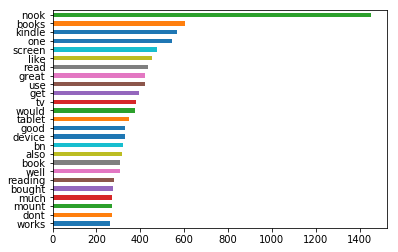

In [191]:
df_dtm.sum().sort_values(ascending=False).head(25)[::-1].plot.barh()

### Identifying biggest documents

In [194]:
#axis =1 means rows
df_dtm.sum(axis=1).sort_values(ascending=False).head(5)

387    1064
273     971
563     766
552     703
248     689
dtype: int64

In [199]:
#amazon.loc[387]['reviewText']

In [203]:
amazon.loc[387]['reviewText'][:60]

'EDIT - Update 1.4.1 (12/21/2011): BIG update rolled out on D'

In [204]:
frequent_words=df_dtm.sum().sort_values(ascending=False).head(20).index

In [205]:
frequent_words

Index(['nook', 'books', 'kindle', 'one', 'screen', 'like', 'read', 'great',
       'use', 'get', 'tv', 'would', 'tablet', 'good', 'device', 'bn', 'also',
       'book', 'well', 'reading'],
      dtype='object')

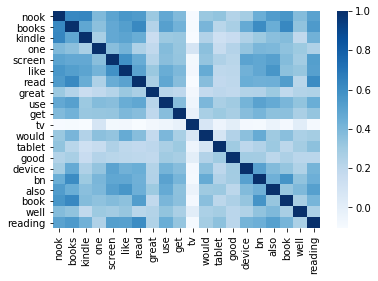

In [209]:
words_corr=df_dtm[frequent_words].corr()
import seaborn as sns
sns.heatmap(words_corr,cmap="Blues")

### Words Similarity (Sematic Analysis)

In [211]:
#cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [220]:
cos_sim=cosine_similarity([df_dtm['screen'],df_dtm['kindle']])
cos_sim

array([[1.        , 0.53338201],
       [0.53338201, 1.        ]])

In [225]:
cos_sim = pd.DataFrame(cosine_similarity(df_dtm.T),
                       index=df_dtm.columns,
                       columns=df_dtm.columns)
cos_sim.head()

,aaa,aac,abandoning,abilities,ability,able,abnormally,aboutdo,aboutif,absence,...,zillions,zip,zippered,zippier,zippy,zirco,zoom,zooming,zooms,zune
aaa,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000
aac,0.0,1.0,0.0,0.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000
abandoning,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000
abilities,0.0,0.5,0.0,1.000000,0.051848,0.032616,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.387298,0.00000,0.0,0.000000
ability,0.0,0.0,0.0,0.051848,1.000000,0.202930,0.103695,0.0,0.0,0.0,...,0.0,0.119737,0.0,0.20739,0.0,0.0,0.133870,0.20739,0.0,0.073324


In [234]:
def get_similar_words(word,cos_sim):
    cos_sim_word=cos_sim[word].sort_values(
    ascending=False).drop(word).head(5).index.values
    return list(cos_sim_word)

In [235]:
get_similar_words('tablet',cos_sim)

['apps', 'character', 'android', 'tablets', 'designed']

In [236]:
## Bigrams
cv=CountVectorizer(ngram_range=(2,2))

In [239]:
cv=CountVectorizer(ngram_range=(2,2))
sparse_matrix=cv.fit_transform(docs_clean)
np_matrix=sparse_matrix.toarray()
df_dtm=pd.DataFrame(np_matrix,columns=cv.get_feature_names())
df_dtm.head()

,aaa batteries,aac soundtracks,abandoning normal,abilities aware,abilities full,abilities screen,abilities stripped,ability add,ability borrow,ability box,...,zoom rotate,zoom text,zoom type,zoom use,zooming awkward,zooming features,zooming scrolling,zooms touch,zune ive,zune place
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


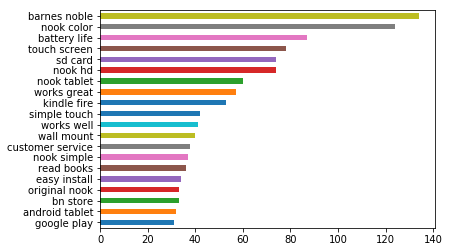

In [242]:
df_dtm.sum().sort_values(ascending=False).head(20)[::-1].plot.barh()